# Fifth Data Preparation Process

In this notebook file, the quality of the dataset will be analyzed more deeply.

Normally these analyzes should be done as first step in the data preparation process.

However in this project, performance differences will be observed between models that trained with differently prepared data.

In this way, the importance of different data preparation processes will be highlighted.

Resized data will be read from pkl file.

Training, Validation and Test DataFrames will be concatenated.

Analyzes will be performed on the concatenated DataFrame, and necessary changes will be made for each DataFrame separately.

Since FullPhoto and FaceOnly datasets are the same in terms of splitting and ordering, the analysis will be performed on a single dataset and the changes will be made to both datasets in the same way.

Changed DataFrames will be saved as pkl files for future use after being checked.

In [1]:
#Libraries are being imported
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, personDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(personDf.iloc[imgDf.iloc[i].PersonID].Name)
    
    plt.show()
    
    return

In [4]:
#Person dataframe in ResizeData is being read from pkl file
personDf = pd.read_pickle("../Data/ResizedData/Person.pkl")
personDf

,Name
ID,
0,Abdullah Gul
1,Adrien Brody
2,Ahmed Chalabi
3,Ai Sugiyama
4,Alan Greenspan
...,...
418,Yasser Arafat
419,Yoko Ono
420,Yoriko Kawaguchi


In [5]:
#FullPhoto training data is being read from pkl file
trainingDf = pd.read_pickle("../Data/ResizedData/FullPhoto/Training.pkl")
trainingDf

,PersonID,ImageBGR
0,22,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,125,"[[[29, 43, 55], [29, 43, 55], [28, 42, 54], [2..."
2,356,"[[[59, 59, 53], [58, 58, 52], [57, 56, 51], [5..."
3,277,"[[[37, 32, 29], [37, 32, 31], [38, 33, 32], [3..."
4,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
4151,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4152,120,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4153,322,"[[[193, 202, 211], [193, 202, 211], [193, 205,..."
4154,383,"[[[10, 13, 51], [10, 13, 51], [11, 13, 53], [1..."


In [6]:
#FullPhoto validation data is being read from pkl file
validationDf = pd.read_pickle("../Data/ResizedData/FullPhoto/Validation.pkl")
validationDf

,PersonID,ImageBGR
0,171,"[[[28, 8, 3], [28, 8, 3], [28, 8, 3], [28, 8, ..."
1,120,"[[[13, 20, 15], [13, 20, 15], [13, 20, 15], [1..."
2,196,"[[[60, 67, 60], [60, 67, 60], [60, 67, 60], [5..."
3,95,"[[[94, 131, 175], [98, 135, 179], [99, 136, 18..."
4,380,"[[[84, 37, 15], [83, 36, 14], [83, 36, 14], [8..."
...,...,...
909,71,"[[[2, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], ..."
910,183,"[[[58, 34, 22], [52, 28, 18], [44, 22, 11], [4..."
911,120,"[[[4, 0, 0], [2, 0, 0], [2, 0, 0], [1, 0, 0], ..."
912,120,"[[[27, 51, 71], [26, 50, 70], [26, 50, 68], [2..."


In [7]:
#FullPhoto test data is being read from pkl file
testDf = pd.read_pickle("../Data/ResizedData/FullPhoto/Test.pkl")
testDf

,PersonID,ImageBGR
0,270,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
1,80,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,14,"[[[100, 142, 119], [100, 142, 119], [100, 142,..."
3,120,"[[[166, 148, 131], [167, 146, 129], [159, 136,..."
4,401,"[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ..."
...,...,...
910,291,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
911,302,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
912,401,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
913,340,"[[[9, 32, 77], [9, 32, 77], [9, 32, 77], [10, ..."


In [8]:
#Training, Validation and Test data are being concatenated
concatDf = pd.concat([trainingDf, validationDf, testDf])
concatDf

,PersonID,ImageBGR
0,22,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,125,"[[[29, 43, 55], [29, 43, 55], [28, 42, 54], [2..."
2,356,"[[[59, 59, 53], [58, 58, 52], [57, 56, 51], [5..."
3,277,"[[[37, 32, 29], [37, 32, 31], [38, 33, 32], [3..."
4,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
910,291,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
911,302,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
912,401,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
913,340,"[[[9, 32, 77], [9, 32, 77], [9, 32, 77], [10, ..."


In [9]:
#A new DataFrame to keep number of images belonging to each person is being created and sorted by Number of Images
#Statistical work will be done on this dataframe
totalDf = pd.DataFrame(concatDf.groupby(['PersonID']).size(), columns = ['Images']).sort_values(by = ['Images', 'PersonID'])
del concatDf
totalDf

,Images
PersonID,
2,5
3,5
4,5
5,5
9,5
...,...
121,109
95,121
391,144


In [10]:
#Statistical data of totalDf is being displayed with a function of the pandas library
#The parts between the min and max values are called quartiles
#See https://en.wikipedia.org/wiki/Quartile for details
totalDf.describe()

,Images
count,423.000000
mean,14.148936
std,30.797828
min,5.000000
25%,5.000000
50%,8.000000
75%,13.500000
max,530.000000


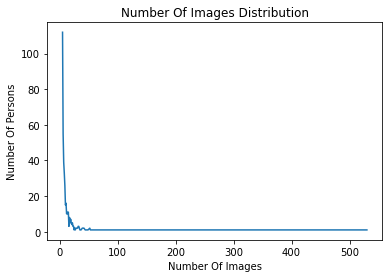

In [11]:
#The distribution of people is being plotted according to the number of images belong to them
forChart = totalDf.groupby(['Images']).size()
plt.plot(forChart.index,forChart.values)
del forChart
plt.title("Number Of Images Distribution")
plt.xlabel("Number Of Images")
plt.ylabel("Number Of Persons")
plt.show()

In [12]:
#The number of people in the dataset is 423
#10% of the number of people in the dataset will be sufficient for a project of this level
#The analysis will be continued by dividing it into deciles according to the number of images
#See https://en.wikipedia.org/wiki/Decile for details

#With deciles, the maximum and minimum values are also being taken with a function of the pandas library
#See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html for details
totalDf.quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

,Images
0.0,5.0
0.1,5.0
0.2,5.0
0.3,6.0
0.4,7.0
0.5,8.0
0.6,9.0
0.7,11.4
0.8,15.6
0.9,24.0


In [13]:
#Data between [0.8, 0.9] is being taken
selectedPersonDf = totalDf[(totalDf['Images'] > 15) & (totalDf['Images'] < 24)]
selectedPersonDf

,Images
PersonID,
135,16
382,16
393,16
41,17
166,17
187,17
190,17
195,17
321,17


In [14]:
#Between 80%  And 90% person dataframe being created based on selectedPersonDf and its index is being renamed as OldID
between80and90PersonDf = personDf[personDf.index.isin(selectedPersonDf.index.values)]
between80and90PersonDf.index.rename('OldID', inplace = True)
between80and90PersonDf

,Name
OldID,
0,Abdullah Gul
14,Amelie Mauresmo
21,Angelina Jolie
41,Bill Gates
56,Carlos Menem
57,Carlos Moya
110,Fidel Castro
119,George Robertson
135,Halle Berry


In [15]:
#New indexes are being appended to between80and90PersonDf and index of between80and90PersonDf is being renamed as ID
between80and90PersonDf.reset_index(inplace = True)
between80and90PersonDf.index.rename('ID', inplace = True)
between80and90PersonDf

,OldID,Name
ID,,
0,0,Abdullah Gul
1,14,Amelie Mauresmo
2,21,Angelina Jolie
3,41,Bill Gates
4,56,Carlos Menem
5,57,Carlos Moya
6,110,Fidel Castro
7,119,George Robertson
8,135,Halle Berry


In [16]:
#In data above 0.9, the number of images that belongs the people is spread over a very large range(min 25, max 530)
#Two methods can be followed to balance such data

#1)Data Augmentation
#The number of images of people represented by a small number of images can be increased with this method
#Since this process will be discussed in the training section, it will not be mentioned for now
#See https://en.wikipedia.org/wiki/Data_augmentation for details

#1)Delete
#The number of images of people represented by more than minimum number of images can be reduce with this method
#Persons represented by more than 24 images in totaldf will be taken
#People represented with the least number of images in trainingDf will be represented with 17 (25 - 25 // 3) images
#this number is 4 (25 // 3) for the sum of validationdf and testDf

#Data above 0.9 is being taken
selectedPersonDf = totalDf[totalDf['Images'] > 24]
selectedPersonDf

,Images
PersonID,
387,25
129,26
346,26
322,27
153,28
205,28
39,29
246,29
131,30


In [17]:
#Above 90% person dataframe being created based on selectedPersonDf and its index is being renamed as OldID
above90PersonDf = personDf[personDf.index.isin(selectedPersonDf.index.values)]
above90PersonDf.index.rename('OldID', inplace = True)
above90PersonDf

,Name
OldID,
7,Alejandro Toledo
10,Alvaro Uribe
17,Andre Agassi
26,Ariel Sharon
30,Arnold Schwarzenegger
39,Bill Clinton
79,Colin Powell
84,David Beckham
95,Donald Rumsfeld


In [18]:
#New indexes are being appended to above90PersonDf and index of above90PersonDf is being renamed as ID
above90PersonDf.reset_index(inplace = True)
above90PersonDf.index.rename('ID', inplace = True)
above90PersonDf

,OldID,Name
ID,,
0,7,Alejandro Toledo
1,10,Alvaro Uribe
2,17,Andre Agassi
3,26,Ariel Sharon
4,30,Arnold Schwarzenegger
5,39,Bill Clinton
6,79,Colin Powell
7,84,David Beckham
8,95,Donald Rumsfeld


In [19]:
#A new training dataframe is being created by getting the images of people whose 
#in between80and90PersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(between80and90PersonDf.OldID)].reset_index(drop = True)
newTrainingDf

,PersonID,ImageBGR
0,301,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
1,173,"[[[2, 1, 0], [2, 0, 0], [0, 0, 0], [0, 0, 1], ..."
2,309,"[[[2, 2, 8], [2, 2, 8], [2, 2, 8], [2, 2, 7], ..."
3,14,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
4,189,"[[[5, 0, 3], [5, 0, 3], [4, 0, 3], [4, 0, 3], ..."
...,...,...
524,190,"[[[239, 245, 244], [241, 246, 245], [243, 249,..."
525,311,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
526,173,"[[[12, 19, 58], [14, 19, 58], [14, 19, 58], [1..."
527,232,"[[[9, 68, 87], [3, 59, 83], [6, 55, 89], [9, 5..."


In [20]:
#PersonID column in newTrainingDf is being replaced with ID column in between80and90PersonDf
#based on OldID column in between80and90PersonDf 
#between80and90PersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(between80and90PersonDf.OldID.values, between80and90PersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR
0,28,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
1,13,"[[[2, 1, 0], [2, 0, 0], [0, 0, 0], [0, 0, 1], ..."
2,29,"[[[2, 2, 8], [2, 2, 8], [2, 2, 8], [2, 2, 7], ..."
3,1,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
4,16,"[[[5, 0, 3], [5, 0, 3], [4, 0, 3], [4, 0, 3], ..."
...,...,...
524,17,"[[[239, 245, 244], [241, 246, 245], [243, 249,..."
525,30,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
526,13,"[[[12, 19, 58], [14, 19, 58], [14, 19, 58], [1..."
527,23,"[[[9, 68, 87], [3, 59, 83], [6, 55, 89], [9, 5..."


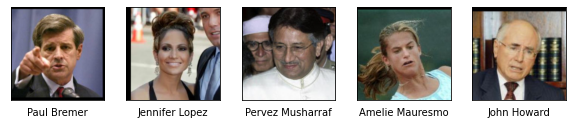

In [21]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), between80and90PersonDf)

In [22]:
#A new validation dataframe is being created by getting the images of people
#whose in between80and90PersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(between80and90PersonDf.OldID)].reset_index(drop = True)
newValidationDf

,PersonID,ImageBGR
0,380,"[[[84, 37, 15], [83, 36, 14], [83, 36, 14], [8..."
1,293,"[[[0, 3, 4], [0, 3, 4], [0, 2, 5], [0, 1, 5], ..."
2,225,"[[[35, 94, 109], [36, 96, 110], [37, 97, 113],..."
3,348,"[[[241, 246, 245], [241, 246, 245], [239, 244,..."
4,286,"[[[73, 95, 130], [77, 100, 134], [78, 103, 137..."
...,...,...
116,135,"[[[108, 42, 7], [109, 43, 8], [110, 44, 9], [1..."
117,309,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
118,57,"[[[20, 15, 30], [18, 13, 28], [17, 12, 27], [1..."
119,21,"[[[244, 246, 234], [245, 247, 235], [245, 247,..."


In [23]:
#PersonID column in newValidationDf is being replaced with ID column in between80and90PersonDf
#based on OldID column in between80and90PersonDf 
#between80and90PersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(between80and90PersonDf.OldID.values, between80and90PersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR
0,36,"[[[84, 37, 15], [83, 36, 14], [83, 36, 14], [8..."
1,27,"[[[0, 3, 4], [0, 3, 4], [0, 2, 5], [0, 1, 5], ..."
2,22,"[[[35, 94, 109], [36, 96, 110], [37, 97, 113],..."
3,33,"[[[241, 246, 245], [241, 246, 245], [239, 244,..."
4,26,"[[[73, 95, 130], [77, 100, 134], [78, 103, 137..."
...,...,...
116,8,"[[[108, 42, 7], [109, 43, 8], [110, 44, 9], [1..."
117,29,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
118,5,"[[[20, 15, 30], [18, 13, 28], [17, 12, 27], [1..."
119,2,"[[[244, 246, 234], [245, 247, 235], [245, 247,..."


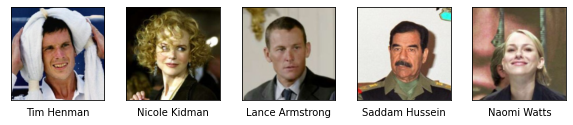

In [24]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), between80and90PersonDf)

In [25]:
#A new test dataframe is being created by getting the images of people 
#whose in between80and90PersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(between80and90PersonDf.OldID)].reset_index(drop = True)
newTestDf

,PersonID,ImageBGR
0,14,"[[[100, 142, 119], [100, 142, 119], [100, 142,..."
1,173,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,14,"[[[0, 0, 3], [0, 0, 2], [0, 0, 1], [1, 0, 1], ..."
3,137,"[[[99, 128, 137], [99, 128, 137], [99, 128, 13..."
4,203,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
115,366,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
116,321,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
117,166,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
118,177,"[[[2, 0, 1], [2, 0, 1], [2, 0, 1], [2, 0, 1], ..."


In [26]:
#PersonID column in newTestDf is being replaced with ID column in between80and90PersonDf 
#based on OldID column in between80and90PersonDf 
#between80and90PersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(between80and90PersonDf.OldID.values, between80and90PersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR
0,1,"[[[100, 142, 119], [100, 142, 119], [100, 142,..."
1,13,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,1,"[[[0, 0, 3], [0, 0, 2], [0, 0, 1], [1, 0, 1], ..."
3,9,"[[[99, 128, 137], [99, 128, 137], [99, 128, 13..."
4,20,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
115,34,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
116,31,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
117,11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
118,14,"[[[2, 0, 1], [2, 0, 1], [2, 0, 1], [2, 0, 1], ..."


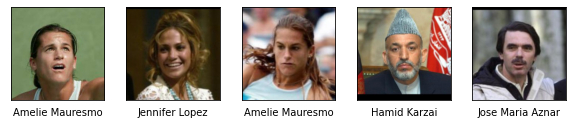

In [27]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), between80and90PersonDf)

In [28]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/Between80And90/FullPhoto/Training.pkl")
newValidationDf.to_pickle("../Data/Between80And90/FullPhoto/Validation.pkl")
newTestDf.to_pickle("../Data/Between80And90/FullPhoto/Test.pkl")

In [29]:
#A new training dataframe is being created by getting the images of people whose 
#in above90PersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(above90PersonDf.OldID)].reset_index(drop = True)
newTrainingDf

,PersonID,ImageBGR
0,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,120,"[[[156, 217, 227], [155, 216, 226], [154, 214,..."
2,10,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,346,"[[[1, 1, 7], [1, 1, 7], [1, 1, 7], [1, 1, 7], ..."
4,205,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
1735,121,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1736,120,"[[[180, 216, 222], [182, 216, 222], [182, 216,..."
1737,222,"[[[67, 90, 116], [66, 89, 115], [67, 91, 117],..."
1738,120,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [30]:
#Since above90 person, represented by minimum of 25 image and maximum of 530 image
#People in trainingDf represents at least 17 (25 - 25 // 3) images
#newTrainingDf is being balanced in terms of the number of images representing people
newTrainingDf = newTrainingDf.groupby('PersonID').head(17).reset_index(drop=True)
newTrainingDf

,PersonID,ImageBGR
0,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,120,"[[[156, 217, 227], [155, 216, 226], [154, 214,..."
2,10,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,346,"[[[1, 1, 7], [1, 1, 7], [1, 1, 7], [1, 1, 7], ..."
4,205,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
709,346,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
710,346,"[[[100, 108, 120], [106, 114, 127], [110, 118,..."
711,153,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
712,322,"[[[4, 3, 132], [15, 17, 141], [33, 37, 153], [..."


In [31]:
#PersonID column in newTrainingDf is being replaced with ID column in above90PersonDf
#based on OldID column in above90PersonDf 
#above90PersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(above90PersonDf.OldID.values, above90PersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR
0,13,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,9,"[[[156, 217, 227], [155, 216, 226], [154, 214,..."
2,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,34,"[[[1, 1, 7], [1, 1, 7], [1, 1, 7], [1, 1, 7], ..."
4,22,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
709,34,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
710,34,"[[[100, 108, 120], [106, 114, 127], [110, 118,..."
711,16,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
712,32,"[[[4, 3, 132], [15, 17, 141], [33, 37, 153], [..."


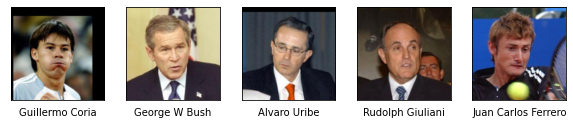

In [32]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), above90PersonDf)

In [33]:
#A new validation dataframe is being created by getting the images of people
#whose in above90PersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(above90PersonDf.OldID)].reset_index(drop = True)
newValidationDf

,PersonID,ImageBGR
0,171,"[[[28, 8, 3], [28, 8, 3], [28, 8, 3], [28, 8, ..."
1,120,"[[[13, 20, 15], [13, 20, 15], [13, 20, 15], [1..."
2,95,"[[[94, 131, 175], [98, 135, 179], [99, 136, 18..."
3,95,"[[[132, 95, 69], [139, 102, 75], [150, 112, 84..."
4,222,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
416,153,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
417,84,"[[[0, 4, 0], [0, 4, 0], [0, 4, 0], [0, 4, 0], ..."
418,120,"[[[4, 0, 0], [2, 0, 0], [2, 0, 0], [1, 0, 0], ..."
419,120,"[[[27, 51, 71], [26, 50, 70], [26, 50, 68], [2..."


In [34]:
#Since above90 person, represented by minimum of 25 image and maximum of 530 image
#People in validationDf and testDf represents at least 4 (25 // 3) images
#Since balancing the test and validation data is not as important as balancing the training data,
#balancing can be done so that each person is represented maximum 3 times in validation and test data.
#3 + 3 = 6,  this is bigger than 4(the amount of representation of the person represented by the least images)
#For this reason, some people will be represented by a few missing images from others
#but it will not be a problem
newValidationDf = newValidationDf.groupby('PersonID').head(3).reset_index(drop=True)
newValidationDf

,PersonID,ImageBGR
0,171,"[[[28, 8, 3], [28, 8, 3], [28, 8, 3], [28, 8, ..."
1,120,"[[[13, 20, 15], [13, 20, 15], [13, 20, 15], [1..."
2,95,"[[[94, 131, 175], [98, 135, 179], [99, 136, 18..."
3,95,"[[[132, 95, 69], [139, 102, 75], [150, 112, 84..."
4,222,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
119,387,"[[[172, 70, 71], [172, 70, 71], [172, 70, 71],..."
120,131,"[[[2, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], ..."
121,84,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
122,129,"[[[198, 215, 224], [198, 215, 224], [198, 214,..."


In [35]:
#PersonID column in newValidationDf is being replaced with ID column in above90PersonDf
#based on OldID column in above90PersonDf 
#above90PersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(above90PersonDf.OldID.values, above90PersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR
0,19,"[[[28, 8, 3], [28, 8, 3], [28, 8, 3], [28, 8, ..."
1,9,"[[[13, 20, 15], [13, 20, 15], [13, 20, 15], [1..."
2,8,"[[[94, 131, 175], [98, 135, 179], [99, 136, 18..."
3,8,"[[[132, 95, 69], [139, 102, 75], [150, 112, 84..."
4,24,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
119,37,"[[[172, 70, 71], [172, 70, 71], [172, 70, 71],..."
120,13,"[[[2, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], ..."
121,7,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
122,12,"[[[198, 215, 224], [198, 215, 224], [198, 214,..."


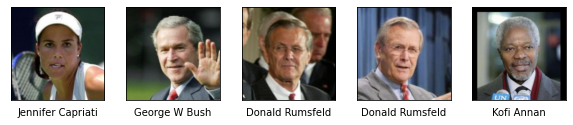

In [36]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), above90PersonDf)

In [37]:
#A new test dataframe is being created by getting the images of people 
#whose in above90PersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(above90PersonDf.OldID)].reset_index(drop = True)
newTestDf

,PersonID,ImageBGR
0,120,"[[[166, 148, 131], [167, 146, 129], [159, 136,..."
1,401,"[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ..."
2,79,"[[[32, 124, 175], [31, 123, 174], [29, 120, 17..."
3,171,"[[[144, 143, 131], [163, 160, 150], [176, 175,..."
4,246,"[[[24, 68, 121], [25, 69, 122], [25, 69, 122],..."
...,...,...
422,148,"[[[174, 166, 153], [174, 166, 153], [175, 167,..."
423,120,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
424,148,"[[[196, 212, 205], [197, 213, 206], [198, 214,..."
425,401,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [38]:
#Since above90 person, represented by minimum of 25 image and maximum of 530 image
#People in validationDf and testDf represents at least 4 (25 // 3) images
#Since balancing the test and validation data is not as important as balancing the training data,
#balancing can be done so that each person is represented maximum 3 times in validation and test data.
#3 + 3 = 6,  this is bigger than 4(the amount of representation of the person represented by the least images)
#For this reason, some people will be represented by a few missing images from others
#but it will not be a problem
newTestDf = newTestDf.groupby('PersonID').head(3).reset_index(drop=True)
newTestDf

,PersonID,ImageBGR
0,120,"[[[166, 148, 131], [167, 146, 129], [159, 136,..."
1,401,"[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ..."
2,79,"[[[32, 124, 175], [31, 123, 174], [29, 120, 17..."
3,171,"[[[144, 143, 131], [163, 160, 150], [176, 175,..."
4,246,"[[[24, 68, 121], [25, 69, 122], [25, 69, 122],..."
...,...,...
121,259,"[[[5, 0, 1], [0, 0, 0], [0, 1, 0], [0, 2, 0], ..."
122,322,"[[[190, 206, 213], [190, 206, 213], [190, 206,..."
123,340,"[[[103, 128, 158], [108, 132, 159], [118, 140,..."
124,39,"[[[160, 196, 192], [156, 193, 190], [154, 192,..."


In [39]:
#PersonID column in newTestDf is being replaced with ID column in above90PersonDf 
#based on OldID column in above90PersonDf 
#above90PersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(above90PersonDf.OldID.values, above90PersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR
0,9,"[[[166, 148, 131], [167, 146, 129], [159, 136,..."
1,40,"[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ..."
2,6,"[[[32, 124, 175], [31, 123, 174], [29, 120, 17..."
3,19,"[[[144, 143, 131], [163, 160, 150], [176, 175,..."
4,28,"[[[24, 68, 121], [25, 69, 122], [25, 69, 122],..."
...,...,...
121,29,"[[[5, 0, 1], [0, 0, 0], [0, 1, 0], [0, 2, 0], ..."
122,32,"[[[190, 206, 213], [190, 206, 213], [190, 206,..."
123,33,"[[[103, 128, 158], [108, 132, 159], [118, 140,..."
124,5,"[[[160, 196, 192], [156, 193, 190], [154, 192,..."


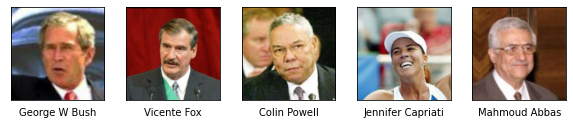

In [40]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), above90PersonDf)

In [41]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/Above90/FullPhoto/Training.pkl")
newValidationDf.to_pickle("../Data/Above90/FullPhoto/Validation.pkl")
newTestDf.to_pickle("../Data/Above90/FullPhoto/Test.pkl")

In [42]:
#FaceOnly training data is being read from pkl file
trainingDf = pd.read_pickle("../Data/ResizedData/FaceOnly/Training.pkl")
trainingDf

,PersonID,ImageBGR,DetectionType
0,22,"[[[71, 116, 99], [69, 116, 98], [67, 115, 98],...",SingleFace
1,125,"[[[10, 24, 36], [12, 26, 38], [18, 32, 44], [2...",NoFace
2,356,"[[[177, 199, 204], [176, 199, 204], [175, 200,...",SingleFace
3,277,"[[[91, 103, 121], [91, 104, 122], [92, 105, 12...",SingleFace
4,131,"[[[42, 65, 81], [38, 61, 77], [30, 53, 68], [2...",SingleFace
...,...,...,...
4151,4,"[[[64, 89, 93], [62, 88, 92], [60, 86, 90], [5...",SingleFace
4152,120,"[[[114, 93, 71], [116, 96, 74], [122, 101, 79]...",SingleFace
4153,322,"[[[197, 207, 207], [196, 208, 210], [195, 207,...",NoFace
4154,383,"[[[7, 5, 5], [7, 5, 5], [8, 5, 5], [8, 6, 6], ...",SingleFace


In [43]:
#FaceOnly validation data is being read from pkl file
validationDf = pd.read_pickle("../Data/ResizedData/FaceOnly/Validation.pkl")
validationDf

,PersonID,ImageBGR,DetectionType
0,171,"[[[64, 65, 56], [93, 94, 85], [143, 144, 135],...",SingleFace
1,120,"[[[102, 116, 110], [106, 120, 114], [115, 129,...",SingleFace
2,196,"[[[23, 40, 43], [23, 40, 43], [24, 41, 44], [2...",SingleFace
3,95,"[[[34, 55, 63], [35, 56, 65], [38, 59, 69], [4...",MultipleFace
4,380,"[[[227, 227, 227], [227, 227, 227], [227, 227,...",SingleFace
...,...,...,...
909,71,"[[[104, 116, 120], [103, 116, 121], [102, 117,...",SingleFace
910,183,"[[[35, 17, 10], [35, 17, 11], [36, 17, 12], [3...",SingleFace
911,120,"[[[109, 141, 160], [105, 137, 156], [97, 129, ...",SingleFace
912,120,"[[[84, 94, 111], [81, 91, 108], [76, 86, 103],...",SingleFace


In [44]:
#FaceOnly test data is being read from pkl file
testDf = pd.read_pickle("../Data/ResizedData/FaceOnly/Test.pkl")
testDf

,PersonID,ImageBGR,DetectionType
0,270,"[[[0, 2, 13], [0, 1, 11], [0, 0, 8], [0, 0, 7]...",SingleFace
1,80,"[[[9, 11, 22], [9, 11, 23], [10, 12, 25], [11,...",SingleFace
2,14,"[[[43, 69, 53], [32, 58, 42], [13, 37, 22], [6...",SingleFace
3,120,"[[[161, 124, 104], [160, 124, 105], [159, 125,...",SingleFace
4,401,"[[[8, 15, 142], [7, 15, 142], [6, 15, 142], [6...",SingleFace
...,...,...,...
910,291,"[[[157, 175, 176], [152, 170, 173], [143, 161,...",SingleFace
911,302,"[[[76, 82, 89], [76, 82, 89], [77, 82, 90], [7...",MultipleFace
912,401,"[[[39, 42, 46], [38, 41, 45], [37, 40, 44], [3...",SingleFace
913,340,"[[[11, 16, 25], [11, 16, 24], [12, 15, 23], [1...",SingleFace


In [45]:
#A new training dataframe is being created by getting the images of people whose 
#in between80and90PersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(between80and90PersonDf.OldID)].reset_index(drop = True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,301,"[[[70, 96, 113], [70, 97, 114], [71, 99, 116],...",SingleFace
1,173,"[[[10, 24, 52], [14, 28, 55], [24, 38, 65], [3...",SingleFace
2,309,"[[[215, 181, 187], [216, 181, 187], [218, 180,...",MultipleFace
3,14,"[[[58, 86, 93], [59, 87, 94], [62, 89, 95], [6...",SingleFace
4,189,"[[[167, 189, 201], [167, 190, 202], [168, 192,...",SingleFace
...,...,...,...
524,190,"[[[174, 186, 190], [169, 182, 186], [159, 172,...",SingleFace
525,311,"[[[20, 33, 47], [19, 32, 47], [16, 31, 46], [1...",SingleFace
526,173,"[[[33, 101, 190], [34, 101, 187], [36, 100, 18...",SingleFace
527,232,"[[[14, 27, 29], [13, 26, 28], [11, 25, 27], [8...",SingleFace


In [46]:
#PersonID column in newTrainingDf is being replaced with ID column in between80and90PersonDf
#based on OldID column in between80and90PersonDf 
#between80and90PersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(between80and90PersonDf.OldID.values, between80and90PersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,28,"[[[70, 96, 113], [70, 97, 114], [71, 99, 116],...",SingleFace
1,13,"[[[10, 24, 52], [14, 28, 55], [24, 38, 65], [3...",SingleFace
2,29,"[[[215, 181, 187], [216, 181, 187], [218, 180,...",MultipleFace
3,1,"[[[58, 86, 93], [59, 87, 94], [62, 89, 95], [6...",SingleFace
4,16,"[[[167, 189, 201], [167, 190, 202], [168, 192,...",SingleFace
...,...,...,...
524,17,"[[[174, 186, 190], [169, 182, 186], [159, 172,...",SingleFace
525,30,"[[[20, 33, 47], [19, 32, 47], [16, 31, 46], [1...",SingleFace
526,13,"[[[33, 101, 190], [34, 101, 187], [36, 100, 18...",SingleFace
527,23,"[[[14, 27, 29], [13, 26, 28], [11, 25, 27], [8...",SingleFace


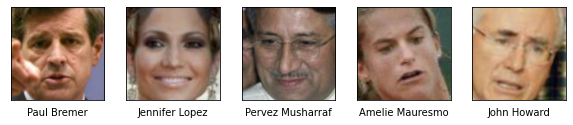

In [47]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), between80and90PersonDf)

In [48]:
#A new validation dataframe is being created by getting the images of people
#whose in between80and90PersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(between80and90PersonDf.OldID)].reset_index(drop = True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,380,"[[[227, 227, 227], [227, 227, 227], [227, 227,...",SingleFace
1,293,"[[[59, 122, 143], [63, 127, 148], [72, 136, 15...",SingleFace
2,225,"[[[90, 112, 124], [89, 111, 123], [88, 110, 12...",SingleFace
3,348,"[[[234, 238, 239], [233, 238, 239], [232, 237,...",SingleFace
4,286,"[[[77, 100, 96], [83, 107, 101], [96, 120, 112...",SingleFace
...,...,...,...
116,135,"[[[39, 10, 0], [34, 8, 0], [26, 4, 0], [21, 2,...",SingleFace
117,309,"[[[243, 248, 247], [243, 248, 247], [242, 247,...",SingleFace
118,57,"[[[15, 12, 14], [15, 12, 14], [15, 12, 14], [1...",SingleFace
119,21,"[[[13, 21, 28], [13, 21, 28], [14, 22, 29], [1...",SingleFace


In [49]:
#PersonID column in newValidationDf is being replaced with ID column in between80and90PersonDf
#based on OldID column in between80and90PersonDf 
#between80and90PersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(between80and90PersonDf.OldID.values, between80and90PersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,36,"[[[227, 227, 227], [227, 227, 227], [227, 227,...",SingleFace
1,27,"[[[59, 122, 143], [63, 127, 148], [72, 136, 15...",SingleFace
2,22,"[[[90, 112, 124], [89, 111, 123], [88, 110, 12...",SingleFace
3,33,"[[[234, 238, 239], [233, 238, 239], [232, 237,...",SingleFace
4,26,"[[[77, 100, 96], [83, 107, 101], [96, 120, 112...",SingleFace
...,...,...,...
116,8,"[[[39, 10, 0], [34, 8, 0], [26, 4, 0], [21, 2,...",SingleFace
117,29,"[[[243, 248, 247], [243, 248, 247], [242, 247,...",SingleFace
118,5,"[[[15, 12, 14], [15, 12, 14], [15, 12, 14], [1...",SingleFace
119,2,"[[[13, 21, 28], [13, 21, 28], [14, 22, 29], [1...",SingleFace


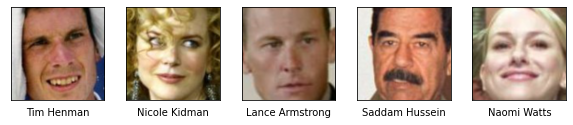

In [50]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), between80and90PersonDf)

In [51]:
#A new test dataframe is being created by getting the images of people 
#whose in between80and90PersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(between80and90PersonDf.OldID)].reset_index(drop = True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,14,"[[[43, 69, 53], [32, 58, 42], [13, 37, 22], [6...",SingleFace
1,173,"[[[25, 29, 24], [24, 29, 24], [23, 29, 24], [2...",SingleFace
2,14,"[[[176, 186, 216], [176, 186, 216], [176, 187,...",SingleFace
3,137,"[[[136, 157, 155], [136, 157, 155], [137, 157,...",SingleFace
4,203,"[[[46, 48, 49], [43, 45, 46], [37, 39, 40], [3...",SingleFace
...,...,...,...
115,366,"[[[81, 86, 95], [82, 88, 97], [84, 93, 103], [...",SingleFace
116,321,"[[[88, 90, 98], [88, 90, 98], [88, 90, 98], [8...",SingleFace
117,166,"[[[20, 36, 42], [28, 44, 51], [43, 59, 65], [5...",SingleFace
118,177,"[[[12, 31, 38], [12, 31, 38], [11, 31, 37], [1...",SingleFace


In [52]:
#PersonID column in newTestDf is being replaced with ID column in between80and90PersonDf 
#based on OldID column in between80and90PersonDf 
#between80and90PersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(between80and90PersonDf.OldID.values, between80and90PersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,1,"[[[43, 69, 53], [32, 58, 42], [13, 37, 22], [6...",SingleFace
1,13,"[[[25, 29, 24], [24, 29, 24], [23, 29, 24], [2...",SingleFace
2,1,"[[[176, 186, 216], [176, 186, 216], [176, 187,...",SingleFace
3,9,"[[[136, 157, 155], [136, 157, 155], [137, 157,...",SingleFace
4,20,"[[[46, 48, 49], [43, 45, 46], [37, 39, 40], [3...",SingleFace
...,...,...,...
115,34,"[[[81, 86, 95], [82, 88, 97], [84, 93, 103], [...",SingleFace
116,31,"[[[88, 90, 98], [88, 90, 98], [88, 90, 98], [8...",SingleFace
117,11,"[[[20, 36, 42], [28, 44, 51], [43, 59, 65], [5...",SingleFace
118,14,"[[[12, 31, 38], [12, 31, 38], [11, 31, 37], [1...",SingleFace


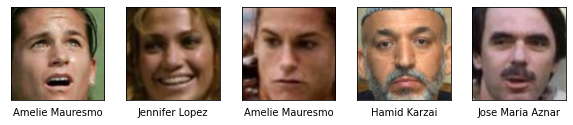

In [53]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), between80and90PersonDf)

In [54]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/Between80And90/FaceOnly/Training.pkl")
newValidationDf.to_pickle("../Data/Between80And90/FaceOnly/Validation.pkl")
newTestDf.to_pickle("../Data/Between80And90/FaceOnly/Test.pkl")

In [55]:
#A new training dataframe is being created by getting the images of people whose 
#in above90PersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(above90PersonDf.OldID)].reset_index(drop = True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,131,"[[[42, 65, 81], [38, 61, 77], [30, 53, 68], [2...",SingleFace
1,120,"[[[84, 111, 145], [84, 111, 145], [83, 111, 14...",SingleFace
2,10,"[[[74, 67, 58], [74, 67, 58], [76, 67, 58], [7...",SingleFace
3,346,"[[[64, 69, 90], [64, 68, 89], [63, 67, 87], [5...",SingleFace
4,205,"[[[28, 46, 87], [30, 48, 89], [34, 52, 93], [3...",SingleFace
...,...,...,...
1735,121,"[[[199, 255, 255], [201, 255, 255], [204, 254,...",SingleFace
1736,120,"[[[49, 81, 87], [49, 80, 86], [48, 78, 84], [4...",SingleFace
1737,222,"[[[47, 56, 76], [48, 57, 77], [49, 58, 78], [5...",SingleFace
1738,120,"[[[114, 93, 71], [116, 96, 74], [122, 101, 79]...",SingleFace


In [56]:
#Since above90 person, represented by minimum of 25 image and maximum of 530 image
#People in trainingDf represents at least 17 (25 - 25 // 3) images
#newTrainingDf is being balanced in terms of the number of images representing people
newTrainingDf = newTrainingDf.groupby('PersonID').head(17).reset_index(drop=True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,131,"[[[42, 65, 81], [38, 61, 77], [30, 53, 68], [2...",SingleFace
1,120,"[[[84, 111, 145], [84, 111, 145], [83, 111, 14...",SingleFace
2,10,"[[[74, 67, 58], [74, 67, 58], [76, 67, 58], [7...",SingleFace
3,346,"[[[64, 69, 90], [64, 68, 89], [63, 67, 87], [5...",SingleFace
4,205,"[[[28, 46, 87], [30, 48, 89], [34, 52, 93], [3...",SingleFace
...,...,...,...
709,346,"[[[110, 132, 160], [110, 132, 160], [111, 133,...",SingleFace
710,346,"[[[73, 71, 77], [69, 66, 72], [59, 56, 61], [4...",SingleFace
711,153,"[[[4, 13, 16], [4, 13, 16], [4, 13, 16], [4, 1...",SingleFace
712,322,"[[[115, 115, 85], [116, 118, 89], [118, 122, 9...",SingleFace


In [57]:
#PersonID column in newTrainingDf is being replaced with ID column in above90PersonDf
#based on OldID column in above90PersonDf 
#above90PersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(above90PersonDf.OldID.values, above90PersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,13,"[[[42, 65, 81], [38, 61, 77], [30, 53, 68], [2...",SingleFace
1,9,"[[[84, 111, 145], [84, 111, 145], [83, 111, 14...",SingleFace
2,1,"[[[74, 67, 58], [74, 67, 58], [76, 67, 58], [7...",SingleFace
3,34,"[[[64, 69, 90], [64, 68, 89], [63, 67, 87], [5...",SingleFace
4,22,"[[[28, 46, 87], [30, 48, 89], [34, 52, 93], [3...",SingleFace
...,...,...,...
709,34,"[[[110, 132, 160], [110, 132, 160], [111, 133,...",SingleFace
710,34,"[[[73, 71, 77], [69, 66, 72], [59, 56, 61], [4...",SingleFace
711,16,"[[[4, 13, 16], [4, 13, 16], [4, 13, 16], [4, 1...",SingleFace
712,32,"[[[115, 115, 85], [116, 118, 89], [118, 122, 9...",SingleFace


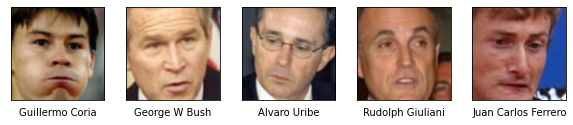

In [58]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), above90PersonDf)

In [59]:
#A new validation dataframe is being created by getting the images of people
#whose in above90PersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(above90PersonDf.OldID)].reset_index(drop = True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,171,"[[[64, 65, 56], [93, 94, 85], [143, 144, 135],...",SingleFace
1,120,"[[[102, 116, 110], [106, 120, 114], [115, 129,...",SingleFace
2,95,"[[[34, 55, 63], [35, 56, 65], [38, 59, 69], [4...",MultipleFace
3,95,"[[[122, 132, 149], [122, 132, 150], [122, 133,...",SingleFace
4,222,"[[[147, 154, 151], [143, 151, 148], [136, 145,...",SingleFace
...,...,...,...
416,153,"[[[125, 177, 190], [125, 176, 188], [124, 173,...",SingleFace
417,84,"[[[30, 211, 255], [28, 212, 255], [24, 213, 25...",SingleFace
418,120,"[[[109, 141, 160], [105, 137, 156], [97, 129, ...",SingleFace
419,120,"[[[84, 94, 111], [81, 91, 108], [76, 86, 103],...",SingleFace


In [60]:
#Since above90 person, represented by minimum of 25 image and maximum of 530 image
#People in validationDf and testDf represents at least 4 (25 // 3) images
#Since balancing the test and validation data is not as important as balancing the training data,
#balancing can be done so that each person is represented maximum 3 times in validation and test data.
#3 + 3 = 6,  this is bigger than 4(the amount of representation of the person represented by the least images)
#For this reason, some people will be represented by a few missing images from others
#but it will not be a problem
newValidationDf = newValidationDf.groupby('PersonID').head(3).reset_index(drop=True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,171,"[[[64, 65, 56], [93, 94, 85], [143, 144, 135],...",SingleFace
1,120,"[[[102, 116, 110], [106, 120, 114], [115, 129,...",SingleFace
2,95,"[[[34, 55, 63], [35, 56, 65], [38, 59, 69], [4...",MultipleFace
3,95,"[[[122, 132, 149], [122, 132, 150], [122, 133,...",SingleFace
4,222,"[[[147, 154, 151], [143, 151, 148], [136, 145,...",SingleFace
...,...,...,...
119,387,"[[[122, 156, 192], [121, 155, 192], [119, 154,...",MultipleFace
120,131,"[[[43, 53, 70], [41, 51, 68], [38, 48, 65], [3...",SingleFace
121,84,"[[[151, 142, 139], [152, 144, 141], [155, 147,...",SingleFace
122,129,"[[[130, 160, 177], [131, 161, 179], [133, 164,...",SingleFace


In [61]:
#PersonID column in newValidationDf is being replaced with ID column in above90PersonDf
#based on OldID column in above90PersonDf 
#above90PersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(above90PersonDf.OldID.values, above90PersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,19,"[[[64, 65, 56], [93, 94, 85], [143, 144, 135],...",SingleFace
1,9,"[[[102, 116, 110], [106, 120, 114], [115, 129,...",SingleFace
2,8,"[[[34, 55, 63], [35, 56, 65], [38, 59, 69], [4...",MultipleFace
3,8,"[[[122, 132, 149], [122, 132, 150], [122, 133,...",SingleFace
4,24,"[[[147, 154, 151], [143, 151, 148], [136, 145,...",SingleFace
...,...,...,...
119,37,"[[[122, 156, 192], [121, 155, 192], [119, 154,...",MultipleFace
120,13,"[[[43, 53, 70], [41, 51, 68], [38, 48, 65], [3...",SingleFace
121,7,"[[[151, 142, 139], [152, 144, 141], [155, 147,...",SingleFace
122,12,"[[[130, 160, 177], [131, 161, 179], [133, 164,...",SingleFace


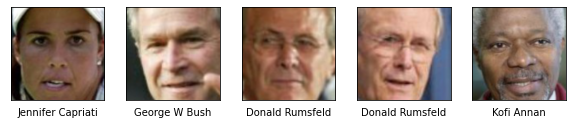

In [62]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), above90PersonDf)

In [63]:
#A new test dataframe is being created by getting the images of people 
#whose in above90PersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(above90PersonDf.OldID)].reset_index(drop = True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,120,"[[[161, 124, 104], [160, 124, 105], [159, 125,...",SingleFace
1,401,"[[[8, 15, 142], [7, 15, 142], [6, 15, 142], [6...",SingleFace
2,79,"[[[129, 179, 225], [128, 179, 223], [127, 179,...",SingleFace
3,171,"[[[219, 200, 195], [219, 200, 195], [221, 201,...",SingleFace
4,246,"[[[141, 161, 218], [140, 160, 218], [138, 159,...",SingleFace
...,...,...,...
422,148,"[[[83, 121, 153], [82, 120, 152], [80, 118, 15...",SingleFace
423,120,"[[[8, 0, 1], [8, 0, 1], [8, 0, 1], [8, 0, 1], ...",SingleFace
424,148,"[[[11, 2, 5], [12, 2, 6], [13, 3, 8], [13, 3, ...",SingleFace
425,401,"[[[39, 42, 46], [38, 41, 45], [37, 40, 44], [3...",SingleFace


In [64]:
#Since above90 person, represented by minimum of 25 image and maximum of 530 image
#People in validationDf and testDf represents at least 4 (25 // 3) images
#Since balancing the test and validation data is not as important as balancing the training data,
#balancing can be done so that each person is represented maximum 3 times in validation and test data.
#3 + 3 = 6,  this is bigger than 4(the amount of representation of the person represented by the least images)
#For this reason, some people will be represented by a few missing images from others
#but it will not be a problem
newTestDf = newTestDf.groupby('PersonID').head(3).reset_index(drop=True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,120,"[[[161, 124, 104], [160, 124, 105], [159, 125,...",SingleFace
1,401,"[[[8, 15, 142], [7, 15, 142], [6, 15, 142], [6...",SingleFace
2,79,"[[[129, 179, 225], [128, 179, 223], [127, 179,...",SingleFace
3,171,"[[[219, 200, 195], [219, 200, 195], [221, 201,...",SingleFace
4,246,"[[[141, 161, 218], [140, 160, 218], [138, 159,...",SingleFace
...,...,...,...
121,259,"[[[3, 5, 13], [2, 4, 12], [1, 1, 9], [0, 1, 9]...",SingleFace
122,322,"[[[191, 207, 214], [192, 208, 215], [193, 209,...",NoFace
123,340,"[[[66, 84, 91], [58, 75, 82], [42, 57, 63], [3...",MultipleFace
124,39,"[[[184, 214, 209], [185, 215, 210], [186, 216,...",SingleFace


In [65]:
#PersonID column in newTestDf is being replaced with ID column in above90PersonDf 
#based on OldID column in above90PersonDf 
#above90PersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(above90PersonDf.OldID.values, above90PersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,9,"[[[161, 124, 104], [160, 124, 105], [159, 125,...",SingleFace
1,40,"[[[8, 15, 142], [7, 15, 142], [6, 15, 142], [6...",SingleFace
2,6,"[[[129, 179, 225], [128, 179, 223], [127, 179,...",SingleFace
3,19,"[[[219, 200, 195], [219, 200, 195], [221, 201,...",SingleFace
4,28,"[[[141, 161, 218], [140, 160, 218], [138, 159,...",SingleFace
...,...,...,...
121,29,"[[[3, 5, 13], [2, 4, 12], [1, 1, 9], [0, 1, 9]...",SingleFace
122,32,"[[[191, 207, 214], [192, 208, 215], [193, 209,...",NoFace
123,33,"[[[66, 84, 91], [58, 75, 82], [42, 57, 63], [3...",MultipleFace
124,5,"[[[184, 214, 209], [185, 215, 210], [186, 216,...",SingleFace


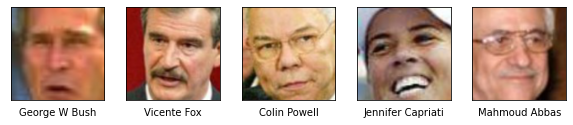

In [66]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), above90PersonDf)

In [67]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/Above90/FaceOnly/Training.pkl")
newValidationDf.to_pickle("../Data/Above90/FaceOnly/Validation.pkl")
newTestDf.to_pickle("../Data/Above90/FaceOnly/Test.pkl")

In [68]:
#OldID column is being deleted from between80and90PersonDf
between80and90PersonDf = between80and90PersonDf.drop(columns=['OldID'])
between80and90PersonDf

,Name
ID,
0,Abdullah Gul
1,Amelie Mauresmo
2,Angelina Jolie
3,Bill Gates
4,Carlos Menem
5,Carlos Moya
6,Fidel Castro
7,George Robertson
8,Halle Berry


In [69]:
#OldID column is being deleted from above90PersonDf
above90PersonDf = above90PersonDf.drop(columns=['OldID'])
above90PersonDf

,Name
ID,
0,Alejandro Toledo
1,Alvaro Uribe
2,Andre Agassi
3,Ariel Sharon
4,Arnold Schwarzenegger
5,Bill Clinton
6,Colin Powell
7,David Beckham
8,Donald Rumsfeld


In [70]:
#Reorganized person data is being saved as pkl file for future use
between80and90PersonDf.to_pickle("../Data/Between80And90/Person.pkl")
above90PersonDf.to_pickle("../Data/Above90/Person.pkl")